In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from deeper.deeper_utils import wrap_deeper
from explanation.deepmatcher_utils import wrapDm
from explanation.mojito2 import explainSamples
import pandas as pd
import deepmatcher as dm
from keras.models import load_model
from deeper.DeepER import init_embeddings_index,init_embeddings_model

Using TensorFlow backend.


## Prelimary operations

In [4]:
# Caricamento strutture dati e modelli ausiliari.
EMBEDDING_FILEPATH ='embeddings/glove.840B.300d.txt'
embeddings_model, tokenizer = init_embeddings_model(EMBEDDING_FILEPATH)

* Costruzione indice degli embeddings.....Fatto. 2196016 embeddings totali.
* Inizializzo il tokenizzatore.....Fatto: 1131743 parole totali.
* Preparazione della matrice di embedding.....Fatto. Dimensioni matrice embeddings: (1131744, 300)

°°° EMBEDDING MODEL °°°
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 300)    339523200   Tupla_A[0][0]                    
                         

In [5]:
predict_fn_deeper = lambda data,model,ignore: wrap_deeper(data,'ltable_','rtable_',model,tokenizer,embeddings_model,
                                                  ignore_columns=ignore)

In [6]:
predict_fn_deepmatcher = lambda data,model,ignore: wrapDm(data,model,ignore_columns=ignore)

## BeerAdvo-Ratebeer

In [7]:
augmented_test = pd.read_csv('datasets/beeradvo_ratebeer/augmented_test.csv')
beeradvo = pd.read_csv('datasets/beeradvo_ratebeer/Beeradvo.csv',dtype=str)
ratebeer = pd.read_csv('datasets/beeradvo_ratebeer/Ratebeer.csv',dtype=str)

In [8]:
beer_deepmatcher = dm.MatchingModel(attr_summarizer='rnn')
beer_deepmatcher.load_state('models/beeradvo_ratebeer_rnn.pth')
beer_deeper = load_model('models/DeepER_best_model_100_beeradvo-ratebeer.h5')

In [9]:
negrank_deeper,flippedneg_deeper = explainSamples(augmented_test,[beeradvo,ratebeer],beer_deeper,predict_fn_deeper,
                                 0,3)

100%|██████████| 20/20 [00:00<00:00, 53.90it/s]


In [10]:
negrank_deepmatcher,flippedneg_deepmatcher = explainSamples(augmented_test,[beeradvo,ratebeer],
                                                            beer_deepmatcher,predict_fn_deepmatcher,0,3)

100%|██████████| 30/30 [00:02<00:00, 10.84it/s]


In [12]:
posrank_deeper,flippedpos_deeper = explainSamples(augmented_test,[beeradvo,ratebeer],beer_deeper,predict_fn_deeper,
                                 1,3)

100%|██████████| 20/20 [00:00<00:00, 48.07it/s]


In [13]:
posrank_deepmatcher,flippedpos_deepmatcher = explainSamples(augmented_test,[beeradvo,ratebeer],beer_deepmatcher,
                                                           predict_fn_deepmatcher,1,3)

100%|██████████| 30/30 [00:02<00:00, 10.91it/s]


In [14]:
flippedneg_deeper.to_csv('rankings/beer_flippedneg_deeper.csv',index=False)
flippedneg_deepmatcher.to_csv('rankings/beer_flippedneg_deepmatcher.csv',index=False)
flippedpos_deeper.to_csv('rankings/beer_flippedpos_deeper.csv',index=False)
flippedpos_deepmatcher.to_csv('rankings/beer_flippedpos_deepmatcher.csv',index=False)

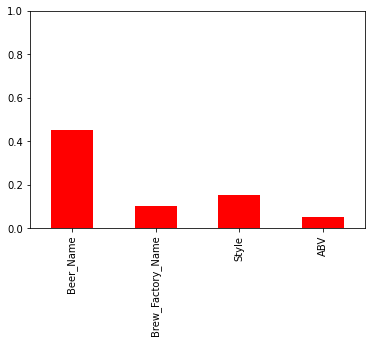

In [36]:
negrank_deeper.plot.bar(color='red',ylim=(0,1))

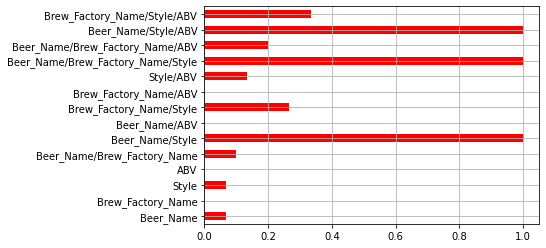

In [17]:
negrank_deepmatcher.plot.barh(color='red',ylim=(0,1),grid=True)

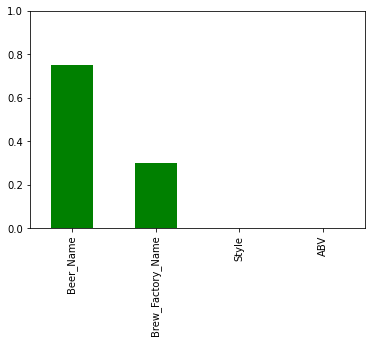

In [30]:
posrank_deeper.plot.bar(color='green',ylim=(0,1))

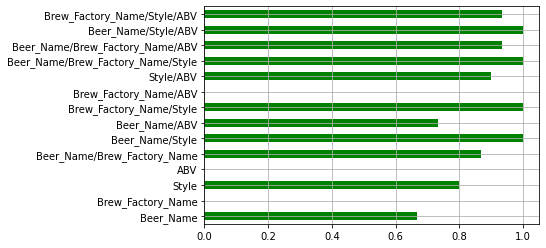

In [18]:
posrank_deepmatcher.plot.barh(color='green',ylim=(0,1),grid=True)

## Walmart-Amazon

In [7]:
augmented_test = pd.read_csv('datasets/walmart_amazon/augmented_test.csv')
walmart = pd.read_csv('datasets/walmart_amazon/walmart.csv',dtype=str)
amazon = pd.read_csv('datasets/walmart_amazon/amazon.csv',dtype=str)

In [8]:
walmart_deepmatcher = dm.MatchingModel(attr_summarizer='rnn')
walmart_deepmatcher.load_state('models/walmart_amazon_rnn.pth')
walmart_deeper = load_model('models/DeepER_best_model_100_walmart-amazon.h5')

In [18]:
negrank_deeper,flippedneg_deeper = explainSamples(augmented_test,[walmart,amazon],walmart_deeper,predict_fn_deeper,0,4)

100%|██████████| 522/522 [01:18<00:00,  6.67it/s]


In [9]:
negrank_deepmatcher,flippedneg_deepmatcher = explainSamples(augmented_test,[walmart,amazon],walmart_deepmatcher,
                             predict_fn_deepmatcher,0,1)

100%|██████████| 548/548 [02:41<00:00,  3.39it/s]


In [13]:
flippedneg_deepmatcher[flippedneg_deepmatcher.alteredAttributes==('title',)]

,ltable_brand,ltable_modelno,ltable_title,ltable_price,ltable_dimensions,ltable_imageurl,ltable_shipweight,rtable_brand,rtable_modelno,rtable_title,rtable_price,rtable_dimensions,rtable_imageurl,rtable_shipweight,alteredAttributes
43,Night Owl Optics,CAM-CM01-245,Night Owl Security Products CAM-CM01-245 Wired...,39.99,12.5 x 3.9 x 0.1 inches,http://ecx.images-amazon.com/images/I/21uunawi...,2 pounds,Durable,NaN,Night Owl Security Products Wired Color Securi...,NaN,NaN,http://ecx.images-amazon.com/images/I/31p2A-r2...,5.3 pounds,"(title,)"


In [20]:
posrank_deeper,flippedpos_deeper = explainSamples(augmented_test,[walmart,amazon],walmart_deeper,predict_fn_deeper,
                             1,4)

100%|██████████| 522/522 [01:19<00:00,  6.54it/s]


In [21]:
posrank_deepmatcher,flippedpos_deepmatcher = explainSamples(augmented_test,[walmart,amazon],walmart_deepmatcher,
                                         predict_fn_deepmatcher,1,4)

100%|██████████| 548/548 [06:44<00:00,  1.35it/s]


In [22]:
flippedpos_deeper.to_csv('walmart_flippedpos_deeper.csv',index=False)
flippedpos_deepmatcher.to_csv('walmart_flippedpos_deepmatcher.csv',index=False)
flippedneg_deeper.to_csv('walmart_flippedneg_deeper.csv',index=False)
flippedneg_deepmatcher.to_csv('walmart_flippedneg_deepmatcher.csv',index=False)

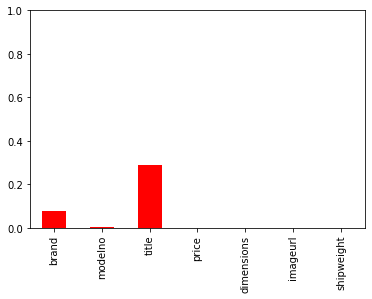

In [46]:
negrank_deeper.plot.bar(color='red',ylim=(0,1))

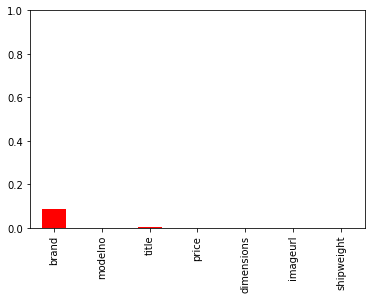

In [10]:
negrank_deepmatcher.plot.bar(color='red',ylim=(0,1))

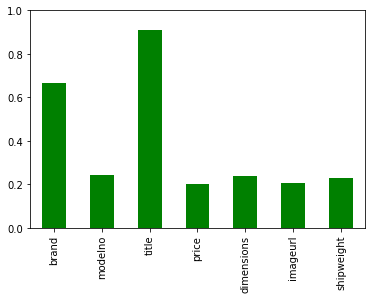

In [50]:
posrank_deeper.plot.bar(color='green',ylim=(0,1))

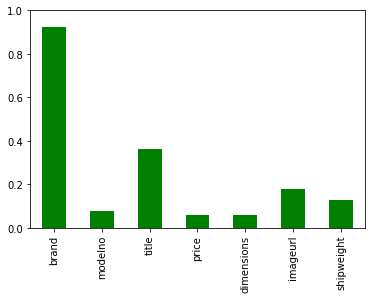

In [51]:
posrank_deepmatcher.plot.bar(color='green',ylim=(0,1))

## Amazon-Google

In [40]:
augmented_test = pd.read_csv('datasets/Amazon-GoogleProducts/augmented_test.csv')
amazon = pd.read_csv('datasets/Amazon-GoogleProducts/Amazon.csv',dtype=str)
google = pd.read_csv('datasets/Amazon-GoogleProducts/Google.csv',dtype=str)

In [41]:
amzgoogle_deepmatcher = dm.MatchingModel(attr_summarizer='rnn')
amzgoogle_deepmatcher.load_state('models/amazon_google_rnn.pth')
amzgoogle_deeper = load_model('models/DeepER_best_model_100_amazon-google.h5')

In [42]:
negrank_deeper,flippedneg_deeper = explainSamples(augmented_test,[amazon,google],amzgoogle_deeper,
                                  predict_fn_deeper,0,3)

100%|██████████| 183/183 [00:27<00:00,  6.67it/s]


In [43]:
negrank_deepmatcher,flippedneg_deepmatcher = explainSamples(augmented_test,[amazon,google],amzgoogle_deepmatcher
                                         ,predict_fn_deepmatcher,0,3)

100%|██████████| 303/303 [02:37<00:00,  1.92it/s]


In [45]:
posrank_deeper,flippedpos_deeper = explainSamples(augmented_test,[amazon,google],amzgoogle_deeper,predict_fn_deeper,1,3)

100%|██████████| 183/183 [00:23<00:00,  7.70it/s]


In [46]:
posrank_deepmatcher,flippedpos_deepmatcher = explainSamples(augmented_test,[amazon,google],amzgoogle_deepmatcher,
                                         predict_fn_deepmatcher,1,3)

100%|██████████| 303/303 [02:29<00:00,  2.02it/s]


In [47]:
flippedpos_deeper.to_csv('amzgoogle_flippedpos_deeper.csv',index=False)
flippedpos_deepmatcher.to_csv('amzgoogle_flippedpos_deepmatcher.csv',index=False)
flippedneg_deeper.to_csv('amzgoogle_flippedneg_deeper.csv',index=False)
flippedneg_deepmatcher.to_csv('amzgoogle_flippedneg_deepmatcher.csv',index=False)

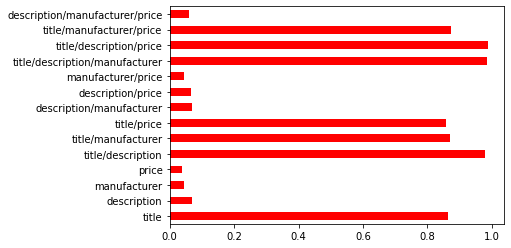

In [49]:
negrank_deeper.plot.barh(color='red',ylim=(0,1))

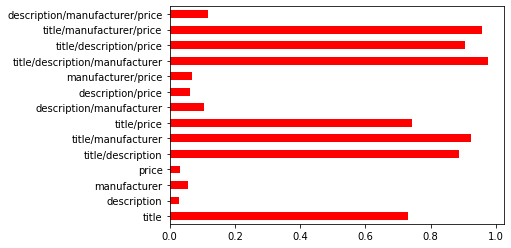

In [50]:
negrank_deepmatcher.plot.barh(color='red',ylim=(0,1))

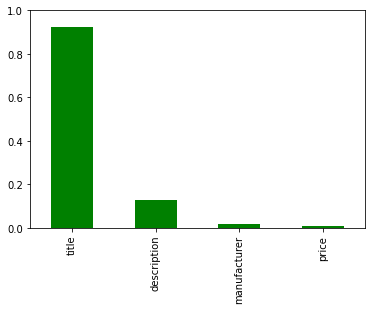

In [71]:
posrank_deeper.plot.bar(color='green',ylim=(0,1))

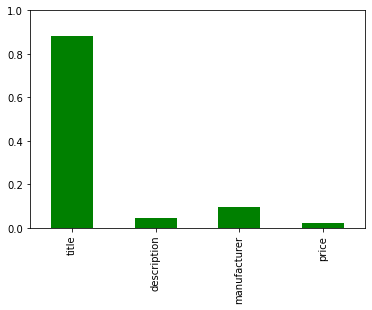

In [72]:
posrank_deepmatcher.plot.bar(color='green',ylim=(0,1))

## DBLP-ACM

In [25]:
augmented_test = pd.read_csv('datasets/DBLP-ACM/augmented_test.csv')
dblp = pd.read_csv('datasets/DBLP-ACM/DBLP2.csv',dtype=str)
acm = pd.read_csv('datasets/DBLP-ACM/ACM.csv',dtype=str)

In [24]:
dblpacm_deeper = load_model('models/DeepER_best_model_100_dblp-acm.h5')
dblpacm_deepmatcher = dm.MatchingModel(attr_summarizer='rnn')
dblpacm_deepmatcher.load_state('models/dblp_acm_rnn.pth')

In [26]:
negrank_deeper,flippedneg_deeper = explainSamples(augmented_test,[dblp,acm],dblpacm_deeper,predict_fn_deeper,
                                   0,3)

100%|██████████| 604/604 [00:11<00:00, 52.72it/s]


In [27]:
negrank_deepmatcher,flippedneg_deepmatcher = explainSamples(augmented_test,[dblp,acm],dblpacm_deepmatcher,predict_fn_deepmatcher,
                                        0,3)

100%|██████████| 629/629 [02:14<00:00,  4.68it/s]


In [28]:
posrank_deeper,flippedpos_deeper = explainSamples(augmented_test,[dblp,acm],dblpacm_deeper,predict_fn_deeper,
                                   1,3)

100%|██████████| 604/604 [00:11<00:00, 51.53it/s]


In [29]:
posrank_deepmatcher,flippedpos_deepmatcher = explainSamples(augmented_test,[dblp,acm],dblpacm_deepmatcher,predict_fn_deepmatcher,
                                        1,3)

100%|██████████| 629/629 [02:14<00:00,  4.66it/s]


In [30]:
flippedpos_deeper.to_csv('dblpacm_flippedpos_deeper.csv',index=False)
flippedpos_deepmatcher.to_csv('dblpacm_flippedpos_deepmatcher.csv',index=False)
flippedneg_deeper.to_csv('dblpacm_flippedneg_deeper.csv',index=False)
flippedneg_deepmatcher.to_csv('dblpacm_flippedneg_deepmatcher.csv',index=False)

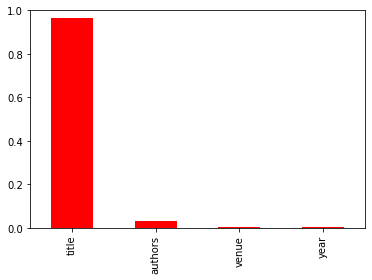

In [78]:
negrank_deeper.plot.bar(color='red',ylim=(0,1))

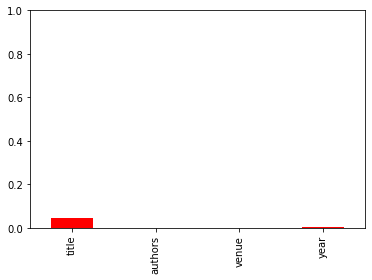

In [79]:
negrank_deepmatcher.plot.bar(color='red',ylim=(0,1))

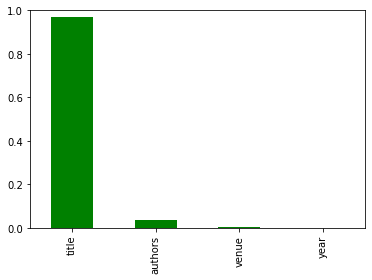

In [82]:
posrank_deeper.plot.bar(color='green',ylim=(0,1))

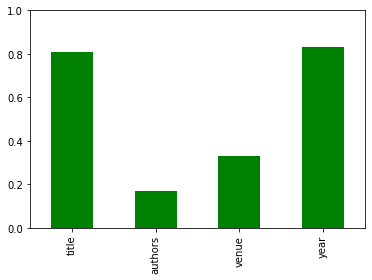

In [83]:
posrank_deepmatcher.plot.bar(color='green',ylim=(0,1))

## DBLP- Scholar

In [7]:
augmented_test = pd.read_csv('datasets/DBLP-Scholar/augmented_test.csv')
dblp = pd.read_csv('datasets/DBLP-Scholar/DBLP.csv',dtype=str)
scholar = pd.read_csv('datasets/DBLP-Scholar/Scholar.csv',dtype=str)

In [8]:
dblpscholar_deeper = load_model('models/DeepER_best_model_100_DBLP_Scholar.h5')
dblpscholar_deepmatcher = dm.MatchingModel(attr_summarizer='rnn')
dblpscholar_deepmatcher.load_state('models/dblp_scholar_rnn.pth')

In [9]:
negrank_deeper,_ = explainSamples(augmented_test,[dblp,scholar],dblpscholar_deeper,predict_fn_deeper,
                                   0,1)

100%|██████████| 1975/1975 [00:27<00:00, 71.42it/s]


In [10]:
posrank_deeper,_ = explainSamples(augmented_test,[dblp,scholar],dblpscholar_deeper,predict_fn_deeper,
                                 1,1)

100%|██████████| 1975/1975 [00:26<00:00, 73.38it/s]


In [12]:
negrank_deepmatcher,_ = explainSamples(augmented_test,[dblp,scholar],dblpscholar_deepmatcher,predict_fn_deepmatcher,
                                      0,1)

100%|██████████| 2032/2032 [11:57<00:00,  2.83it/s]


In [13]:
posrank_deepmatcher,_ = explainSamples(augmented_test,[dblp,scholar],dblpscholar_deepmatcher,predict_fn_deepmatcher,
                                      1,1)

100%|██████████| 2032/2032 [12:06<00:00,  2.80it/s]


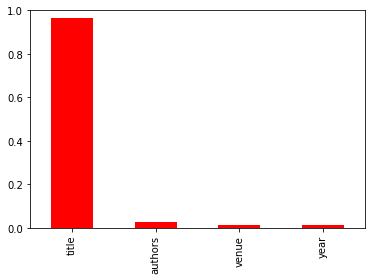

In [14]:
negrank_deeper.plot.bar(color='red',ylim=(0,1))

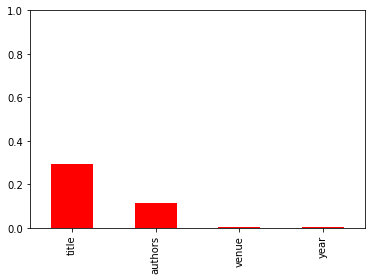

In [15]:
negrank_deepmatcher.plot.bar(color='red',ylim=(0,1))

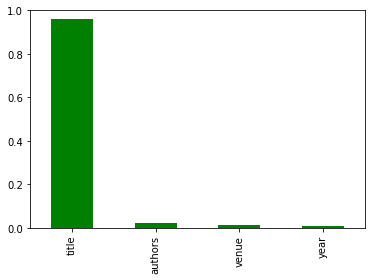

In [16]:
posrank_deeper.plot.bar(color='green',ylim=(0,1))

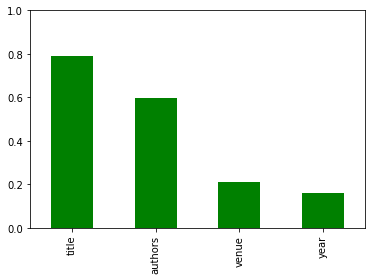

In [17]:
posrank_deepmatcher.plot.bar(color='green',ylim=(0,1))

In [22]:
posrank_deepmatcher.to_csv('posrank_deepmatcher_dblpacm.csv')
posrank_deeper.to_csv('posrank_deeper_dblpacm.csv')
negrank_deepmatcher.to_csv('negrank_deepmatcher_dblpacm.csv')
negrank_deeper.to_csv('negrank_deeper_dblpacm.csv')

## Fodors-Zagats

In [5]:
augmented_test = pd.read_csv('datasets/fodors_zagats/augmented_test.csv')
fodors = pd.read_csv('datasets/fodors_zagats/fodors.csv',dtype=str)
zagats = pd.read_csv('datasets/fodors_zagats/zagats.csv',dtype=str)

In [6]:
##fodors_deeper = load_model('models/DeepER_best_model_100_fodors-zagats.h5')
fodors_deepmatcher = dm.MatchingModel(attr_summarizer='rnn')
fodors_deepmatcher.load_state('models/fodors_zagats_rnn.pth')

In [ ]:
negrank_deeper,_ = explainSamples(correct_deeper,[fodors,zagats],fodors_deeper,predict_fn_deeper,
                                   0,1)

In [7]:
negrank_deepmatcher,_ = explainSamples(augmented_test,[fodors,zagats],fodors_deepmatcher,predict_fn_deepmatcher,
                                        0,1)

100%|██████████| 32/32 [00:03<00:00,  9.55it/s]


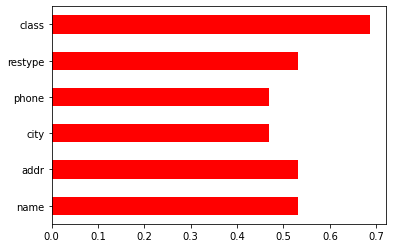

In [8]:
negrank_deepmatcher.plot.barh(color='red')

In [ ]:
ax,negrank = aggregateRankings(negrank_deeper,positive=False,maxLenAttributes=1,lenTriangles=8)

In [9]:
posrank_deepmatcher,_ = explainSamples(augmented_test,[fodors,zagats],fodors_deepmatcher,predict_fn_deepmatcher,
                                        1,1)

100%|██████████| 32/32 [00:03<00:00,  9.89it/s]


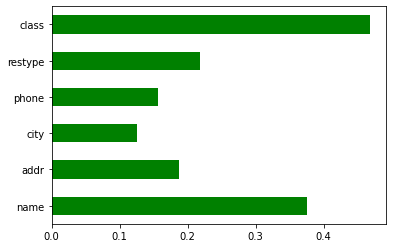

In [11]:
posrank_deepmatcher.plot.barh(color='green')

In [ ]:
posrank_deeper,_,_ = explainSamples(correct_deeper,[fodors,zagats],fodors_deeper,predict_fn_deeper,
                                   1,1)

In [ ]:
ax,posrank = aggregateRankings(posrank_deepmatcher,positive=True,maxLenAttributes=1,lenTriangles=50)

In [ ]:
ax,posrank = aggregateRankings(posrank_deeper,positive=True,maxLenAttributes=1,lenTriangles=8)

## Itunes-Amazon

In [31]:
DATASET_DIR = 'datasets/itunes_amazon/'

In [32]:
augmented_test = pd.read_csv(DATASET_DIR+'augmented_test.csv')
itunes = pd.read_csv(DATASET_DIR+'itunes.csv',dtype=str)
amazon = pd.read_csv(DATASET_DIR+'amazon.csv',dtype=str)

In [33]:
itunes_deeper = load_model('models/DeepER_best_model_100_itunes-amazon.h5')
itunes_deepmatcher = dm.MatchingModel(attr_summarizer='rnn')
itunes_deepmatcher.load_state('models/itunes_amazon_rnn.pth')

In [35]:
negrank_deeper,flippedneg_deeper = explainSamples(augmented_test,[itunes,amazon],itunes_deeper,predict_fn_deeper,
                                   0,4)

100%|██████████| 63/63 [00:14<00:00,  4.31it/s]


In [36]:
negrank_deepmatcher,flippedneg_deepmatcher = explainSamples(augmented_test,[itunes,amazon],itunes_deepmatcher,
                                         predict_fn_deepmatcher,0,4)

100%|██████████| 76/76 [01:19<00:00,  1.04s/it]


In [37]:
posrank_deeper,flippedpos_deeper = explainSamples(augmented_test,[itunes,amazon],itunes_deeper,predict_fn_deeper,
                                   1,4)

100%|██████████| 63/63 [00:15<00:00,  4.06it/s]


In [38]:
posrank_deepmatcher,flippedpos_deepmatcher = explainSamples(augmented_test,[itunes,amazon],itunes_deepmatcher,predict_fn_deepmatcher,
                                        1,4)

100%|██████████| 76/76 [01:20<00:00,  1.06s/it]


In [39]:
flippedpos_deeper.to_csv('itunes_flippedpos_deeper.csv',index=False)
flippedpos_deepmatcher.to_csv('itunes_flippedpos_deepmatcher.csv',index=False)
flippedneg_deeper.to_csv('itunes_flippedneg_deeper.csv',index=False)
flippedneg_deepmatcher.to_csv('itunes_flippedneg_deepmatcher.csv',index=False)

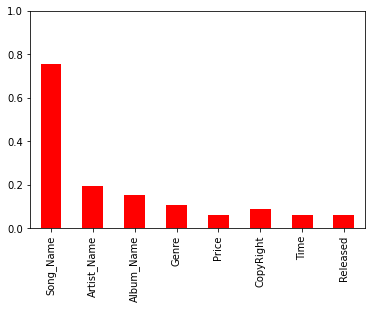

In [59]:
negrank_deeper.plot.bar(color='red',ylim=(0,1))

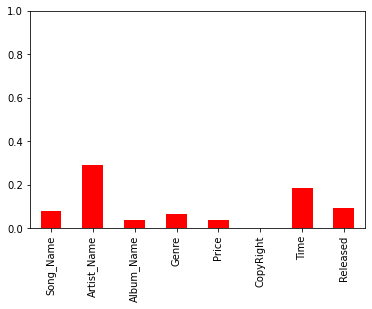

In [13]:
negrank_deepmatcher.plot.bar(color='red',ylim=(0,1))

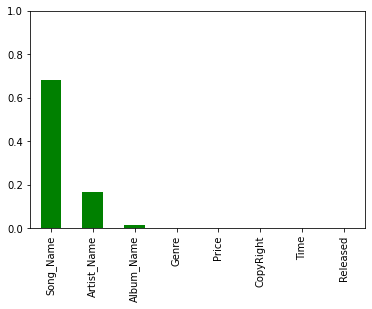

In [61]:
posrank_deeper.plot.bar(color='green',ylim=(0,1))

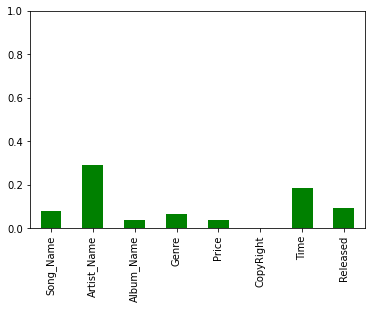

In [62]:
posrank_deepmatcher.plot.bar(color='green',ylim=(0,1))